**DATA EXPLORATION**


In [1]:
#Libraries importation
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

In [3]:
#Import df
data=pd.read_csv("train.csv")
#Rename first column as "ID"
data.rename(columns={'Unnamed: 0': 'ID'}, inplace=True)

data.head(5)

,ID,date,org,tld,ccs,bcced,mail_type,images,urls,salutations,designation,chars_in_subject,chars_in_body,label
0,0,"Mon, 6 Nov 2017 11:13:45 +0100",reply,ebay.in,0,0,multipart/alternative,35,120,0,0,49.0,80027,2
1,1,"Wed, 14 Feb 2018 11:00:16 -0000",edm,efinmail.com,0,0,multipart/alternative,1,7,0,0,107.0,2961,1
2,2,"Wed, 6 Jul 2016 19:53:37 +0000",usebackpack,com,0,0,text/html,4,17,0,0,35.0,25149,1
3,3,"Fri, 11 Oct 2019 11:25:40 +0200",granular,ai,0,0,multipart/mixed,0,0,0,0,15.0,635296,1
4,4,"Tue, 07 Nov 2017 11:07:18 +0000 (UTC)",github,com,1,0,multipart/alternative,2,11,0,0,49.0,2355,1


In [4]:
# Missing values ?
data.isna().sum()

ID                     0
date                   0
org                 3451
tld                 3453
ccs                    0
bcced                  0
mail_type            172
images                 0
urls                   0
salutations            0
designation            0
chars_in_subject      16
chars_in_body          0
label                  0
dtype: int64

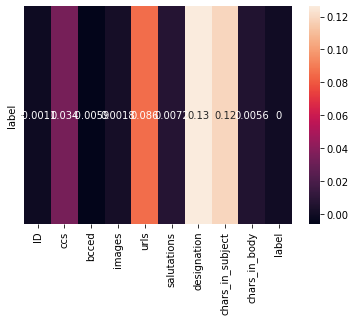

In [6]:
#Correlation matrix with label

corrMatrix = data.corr()
corrMatrix[corrMatrix==1]=0
sn.heatmap(corrMatrix[-1:], annot=True)
plt.show()

In [5]:
# Shape of the dataframe
data.shape

(80176, 14)

In [6]:
#Discrete vs Continuous variable
data.nunique()

ID                  80176
date                47279
org                  1038
tld                   291
ccs                    35
bcced                   2
mail_type              13
images                115
urls                  357
salutations             2
designation             2
chars_in_subject      300
chars_in_body       31586
label                   8
dtype: int64

In [7]:
#Do we have class inbalance ? SPOILER ALERT: YES

# % of the class in the db
data["label"].value_counts()/data.shape[0]*100

1    46.391688
0    22.444372
3    13.379316
2    10.685242
7     6.288665
4     0.445270
6     0.189583
5     0.175863
Name: label, dtype: float64

In [8]:
#Understand the features of each class (mean/std)
data.groupby(["label"]).mean()

,ID,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body
label,,,,,,,,,
0,39730.028008,0.066630,0.000611,6.179772,29.900472,0.295527,0.079244,53.832166,40125.317588
1,40312.157279,0.487808,0.004571,8.773276,31.212932,0.447453,0.098884,47.479478,267701.841968
2,39941.582818,0.006187,0.000233,13.910120,64.158515,0.279678,0.102136,56.398506,55664.387884
3,40210.083621,1.728722,0.004381,0.501165,7.824182,0.639787,0.087816,47.775054,404033.256735
4,39867.383754,0.005602,0.000000,6.288515,42.271709,0.137255,0.002801,64.745098,32079.938375
5,41156.141844,0.014184,0.000000,4.595745,21.177305,0.553191,0.000000,69.184397,134410.354610
6,36446.322368,0.000000,0.000000,7.513158,38.059211,0.203947,0.013158,55.625000,23519.223684
7,39788.622769,0.000000,0.000000,12.963110,80.176914,0.238794,0.284411,71.429988,56491.449821


In [9]:
data.groupby(["label"]).std()

,ID,ccs,bcced,images,urls,salutations,designation,chars_in_subject,chars_in_body
label,,,,,,,,,
0,23137.153430,1.482271,0.024717,9.555537,38.319585,0.456292,0.270127,33.369095,4.017408e+05
1,23173.221844,3.751679,0.067452,448.304338,127.702634,0.497238,0.298511,33.381192,2.363105e+06
2,23088.432564,0.106234,0.015278,12.902266,55.682209,0.448867,0.302845,30.683443,2.232768e+05
3,23117.888321,4.569644,0.066051,2.213517,77.163484,0.480084,0.283040,30.865700,2.626837e+06
4,22719.707788,0.074743,0.000000,5.513335,29.783330,0.344599,0.052926,26.877051,2.651528e+04
5,23610.141581,0.118672,0.000000,8.006229,30.337220,0.498935,0.000000,38.339760,2.318329e+05
6,23987.653697,0.000000,0.000000,10.019839,56.540700,0.404262,0.114327,23.313530,2.624186e+04
7,23094.022319,0.000000,0.000000,11.067924,59.175909,0.426389,0.451178,39.025208,3.424142e+04


In [8]:
#How many value of the categorical variables ?

data["org"].value_counts()
#1038 diffrent variables, too big

iiitd          19943
usebackpack     5070
google          3890
amazon          3123
linkedin        2371
               ...  
xrce               1
bsnl               1
paytmoffers        1
speed              1
iadvize            1
Name: org, Length: 1038, dtype: int64

In [13]:
data["mail_type"].value_counts()[:30]
#291 diffrent variables, too big

multipart/alternative    58449
text/html                10224
multipart/mixed           6461
text/plain                2720
multipart/related         1996
text/html                   58
Multipart/Mixed             39
multipart/signed            26
multipart/report            13
Text/Html                   10
text/calendar                4
Multipart/Alternative        3
multipart/IDM                1
Name: mail_type, dtype: int64